# UX Evaluation of "Can I Joke on you?"

## Preparation

In [1]:
# install needed dependencies
% pip install pandas matplotlib seaborn numpy pingouin

UsageError: Line magic function `%` not found.


In [2]:
# load dependencies
import os 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# load data
# A = with recommender
# B = without recommender

base_path = "./questionnaires/"

with_recommender_file_path = base_path + "A.csv"
without_recommender_file_path = base_path + "B.csv"
A_data = pd.read_csv(with_recommender_file_path)
B_data = pd.read_csv(without_recommender_file_path)

In [4]:
# change labels in dfs

# animacy_labels = [["Dead", "Alive"], ["Stagnant", "Lively"], ["Mechanical", "Organic"], ["Artificial", "Lifelike"], ["Inert", "Interactive"], ["Apathetic", "Responsive"]]
# likeability_labels = [["Dislike", "Like"], ["Unfriendly", "Friendly"], ["Unkind", "Kind"], ["Unpleasant", "Pleasant"], ["Awful", "Nice"]]
# percived_intelligence_labels = [["Incompetent", "Competent"], ["Ignorant", "Knowledgeable"], ["Irresponsible", "Responsible"], ["Unintelligent", "Intelligent"], ["Foolish", "Sensible"]]
# percived_safety_labels = [["Anxious", "Relaxed"], ["Agitated", "Calm"], ["Quiescent", "Surprised"]]

animacy_labels = ["Dead - Alive", "Stagnant - Lively", "Mechanical - Organic", "Artificial - Lifelike", "Inert - Interactive", "Apathetic - Responsive"]
likeability_labels = ["Dislike - Like", "Unfriendly - Friendly", "Unkind - Kind", "Unpleasant - Pleasant", "Awful - Nice"]
percived_intelligence_labels = ["Incompetent - Competent", "Ignorant - Knowledgeable", "Irresponsible - Responsible", "Unintelligent - Intelligent", "Foolish - Sensible"]
percived_safety_labels = ["Anxious - Relaxed", "Agitated - Calm", "Quiescent - Surprised"]

all_labels = ["Date", "Birthdate", "Gender", "Latest Education"] + animacy_labels + likeability_labels + percived_intelligence_labels + percived_safety_labels + ["Feedback"]

print(all_labels)

A_data.columns = all_labels
B_data.columns = all_labels


['Date', 'Birthdate', 'Gender', 'Latest Education', 'Dead - Alive', 'Stagnant - Lively', 'Mechanical - Organic', 'Artificial - Lifelike', 'Inert - Interactive', 'Apathetic - Responsive', 'Dislike - Like', 'Unfriendly - Friendly', 'Unkind - Kind', 'Unpleasant - Pleasant', 'Awful - Nice', 'Incompetent - Competent', 'Ignorant - Knowledgeable', 'Irresponsible - Responsible', 'Unintelligent - Intelligent', 'Foolish - Sensible', 'Anxious - Relaxed', 'Agitated - Calm', 'Quiescent - Surprised', 'Feedback']


## Validity

In [5]:
A_data

,Date,Birthdate,Gender,Latest Education,Dead - Alive,Stagnant - Lively,Mechanical - Organic,Artificial - Lifelike,Inert - Interactive,Apathetic - Responsive,...,Awful - Nice,Incompetent - Competent,Ignorant - Knowledgeable,Irresponsible - Responsible,Unintelligent - Intelligent,Foolish - Sensible,Anxious - Relaxed,Agitated - Calm,Quiescent - Surprised,Feedback
0,2023/12/17 2:45:54 p. m. CET,2001-01-26,Male,Bachelor,3,3,2,3,3,4,...,4,4,4,3,4,3,5,4,2,NaN
1,2023/12/18 2:03:42 p. m. CET,1999-05-20,Male,Master,1,1,1,1,1,1,...,3,2,2,1,1,2,5,4,2,NaN
2,2023/12/19 1:57:22 p. m. CET,2002-09-10,Male,Bachelor,4,3,1,1,3,2,...,4,4,4,2,3,1,4,4,2,NaN
3,2023/12/19 2:39:46 p. m. CET,2000-01-18,Male,Bachelor,2,1,1,2,3,2,...,4,1,2,3,1,3,4,5,2,NaN
4,2023/12/19 7:14:13 p. m. CET,1997-08-25,Male,Bachelor,4,3,2,4,3,2,...,5,3,4,4,4,3,5,4,3,NaN
5,2023/12/19 8:02:03 p. m. CET,2003-04-25,Female,Bachelor,1,2,2,3,3,3,...,3,3,3,3,2,3,2,2,3,NaN
6,2023/12/19 8:47:53 p. m. CET,1971-09-22,Female,Master,4,4,3,3,3,3,...,4,3,3,3,3,3,4,4,3,NaN
7,2023/12/20 10:07:42 a. m. CET,2000-03-12,Female,Bachelor,3,3,2,3,3,3,...,5,4,3,3,3,3,3,5,4,NaN
8,2023/12/20 10:20:29 a. m. CET,2001-10-31,Male,Bachelor,2,3,3,2,3,3,...,4,4,4,4,3,3,4,4,4,NaN
9,2023/12/21 6:42:21 p. m. CET,1998-07-10,Male,Bachelor,2,3,3,2,3,3,...,3,3,3,3,2,2,4,5,3,NaN


## Analysis

### Comparision

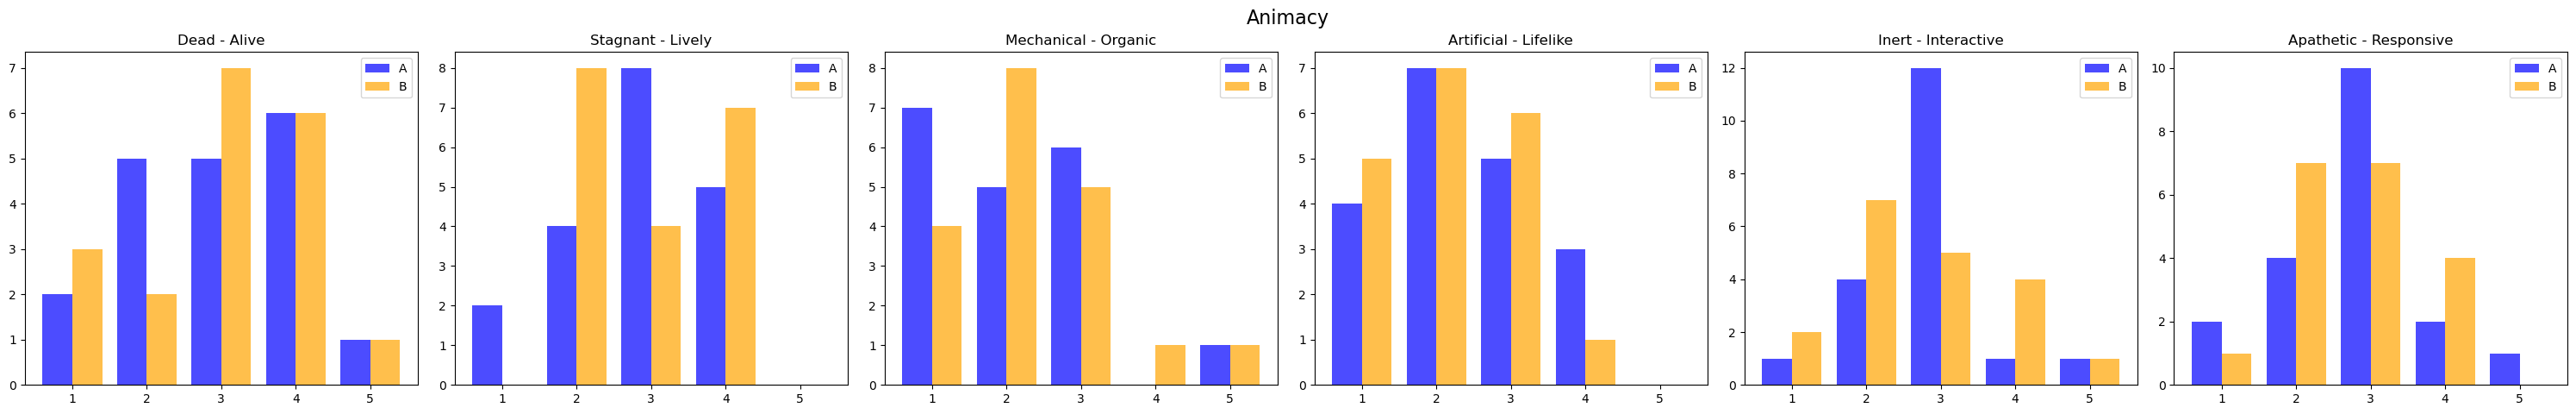

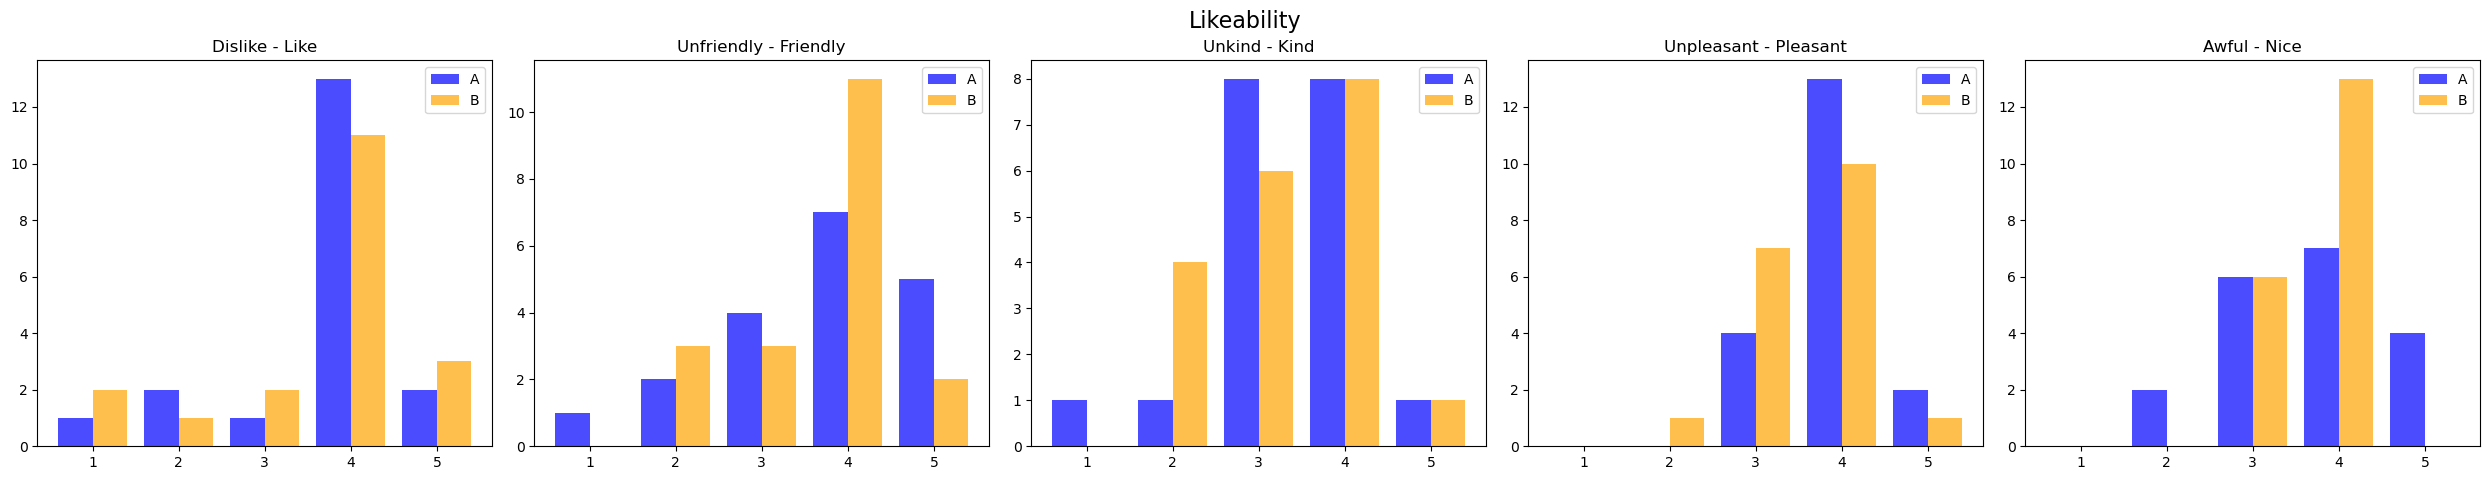

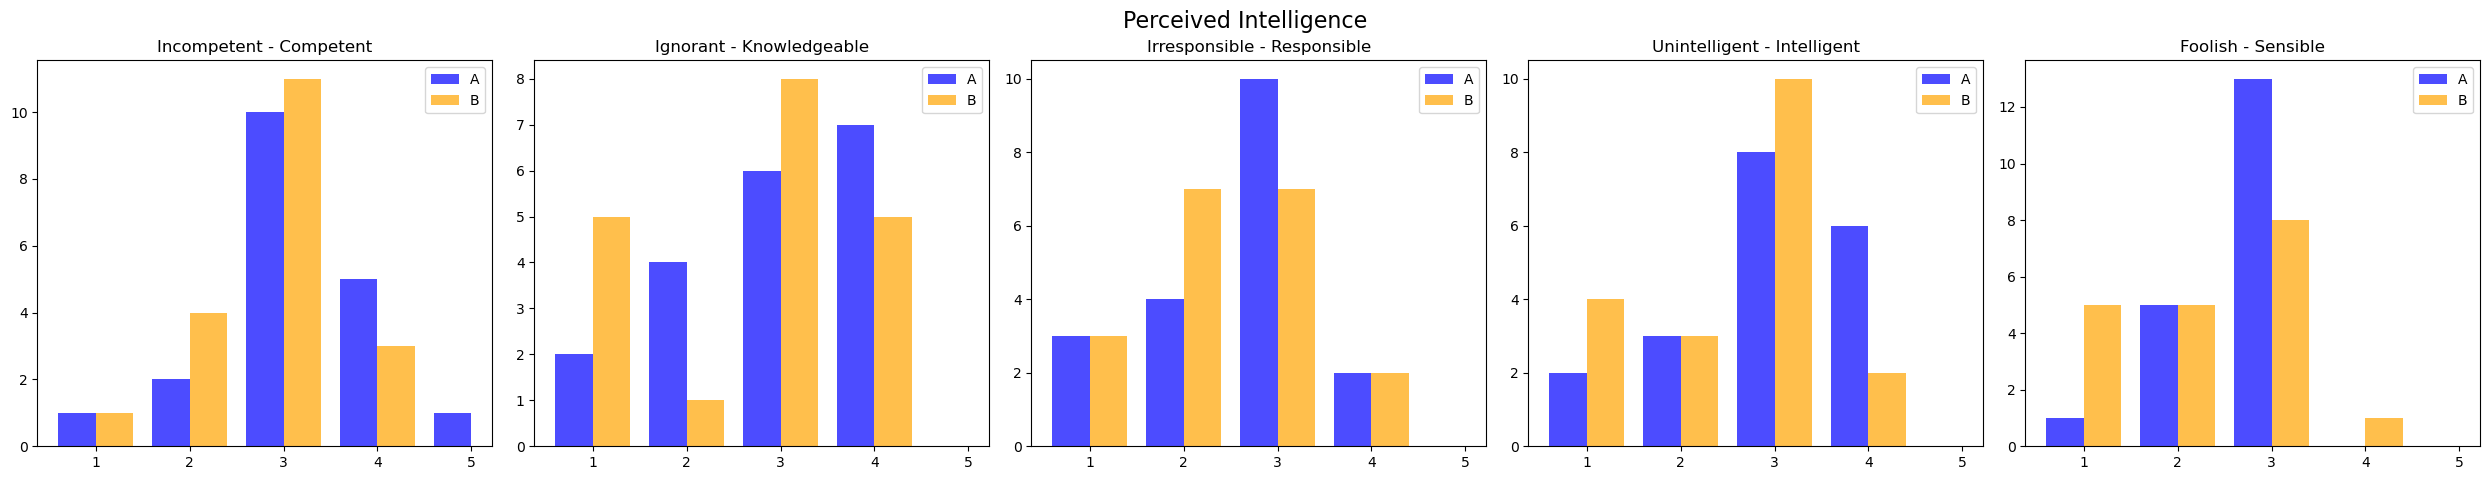

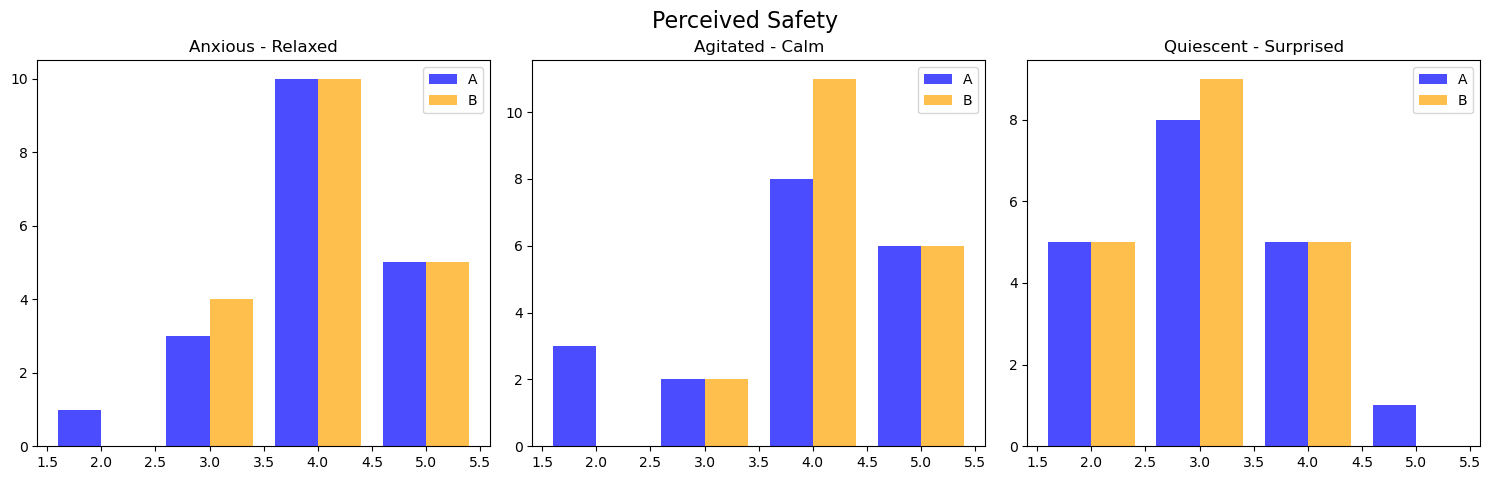

In [6]:
# Function to plot bar charts for a given category for both A_data and B_data
def plot_category(category_columns, A_data, B_data, title, num_cols=3):
    # Plotting subplots for each category
    fig, axs = plt.subplots(1, len(category_columns), figsize=(5 * len(category_columns), 5), sharex=True)

    # Plot questions for A_data
    for i, category in enumerate(category_columns):
        axs[i].bar(A_data[category].value_counts().index - 0.2, A_data[category].value_counts().values, alpha=0.7, width=0.4, label='A', color='blue')

    # Plot questions for B_data
    for i, category in enumerate(category_columns):
        axs[i].bar(B_data[category].value_counts().index + 0.2, B_data[category].value_counts().values, alpha=0.7, width=0.4, label='B', color='orange')

        axs[i].set_title(category)
        axs[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize animacy for both A_data and B_data
plot_category(animacy_labels, A_data, B_data, "Animacy")

# Visualize likeability for both A_data and B_data
plot_category(likeability_labels, A_data, B_data, "Likeability")

# Visualize perceived intelligence for both A_data and B_data
plot_category(percived_intelligence_labels, A_data, B_data, "Perceived Intelligence")

# Visualize perceived safety for both A_data and B_data
plot_category(percived_safety_labels, A_data, B_data, "Perceived Safety")



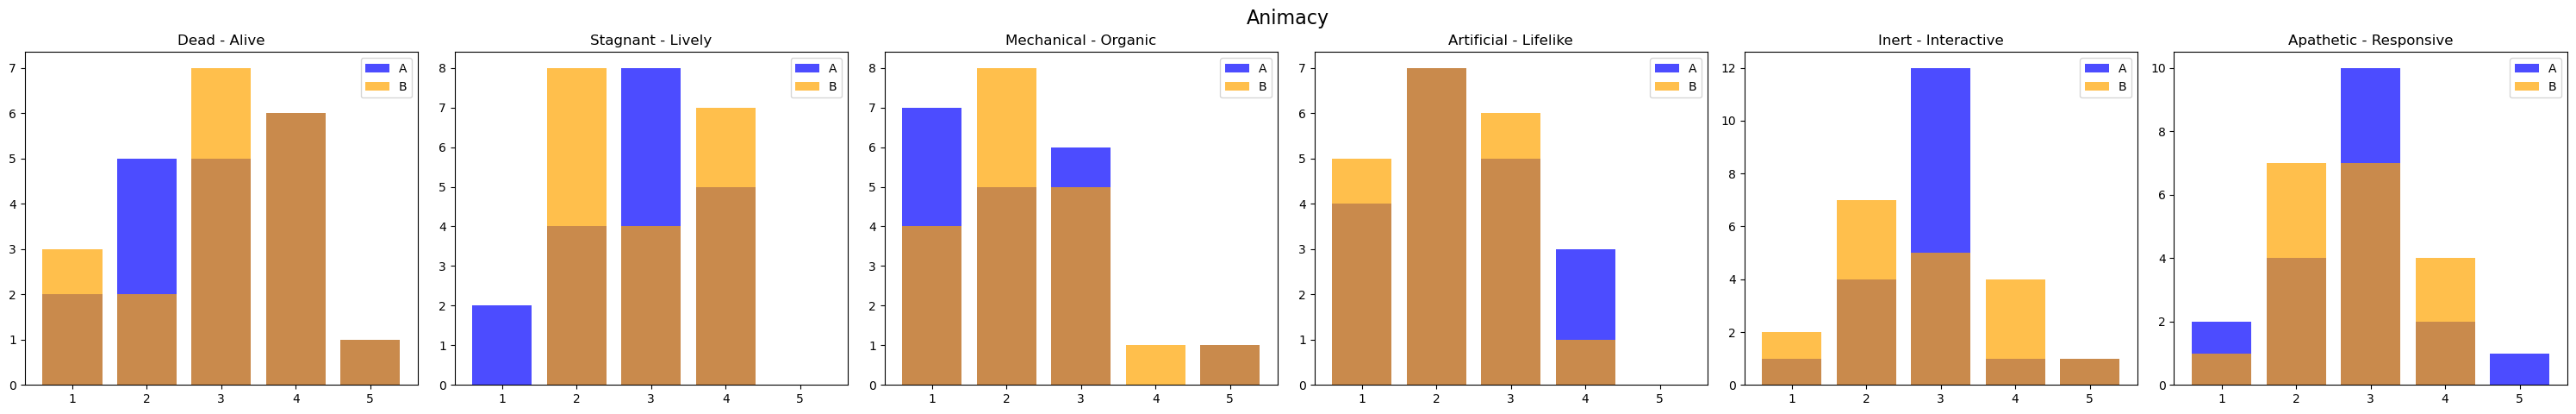

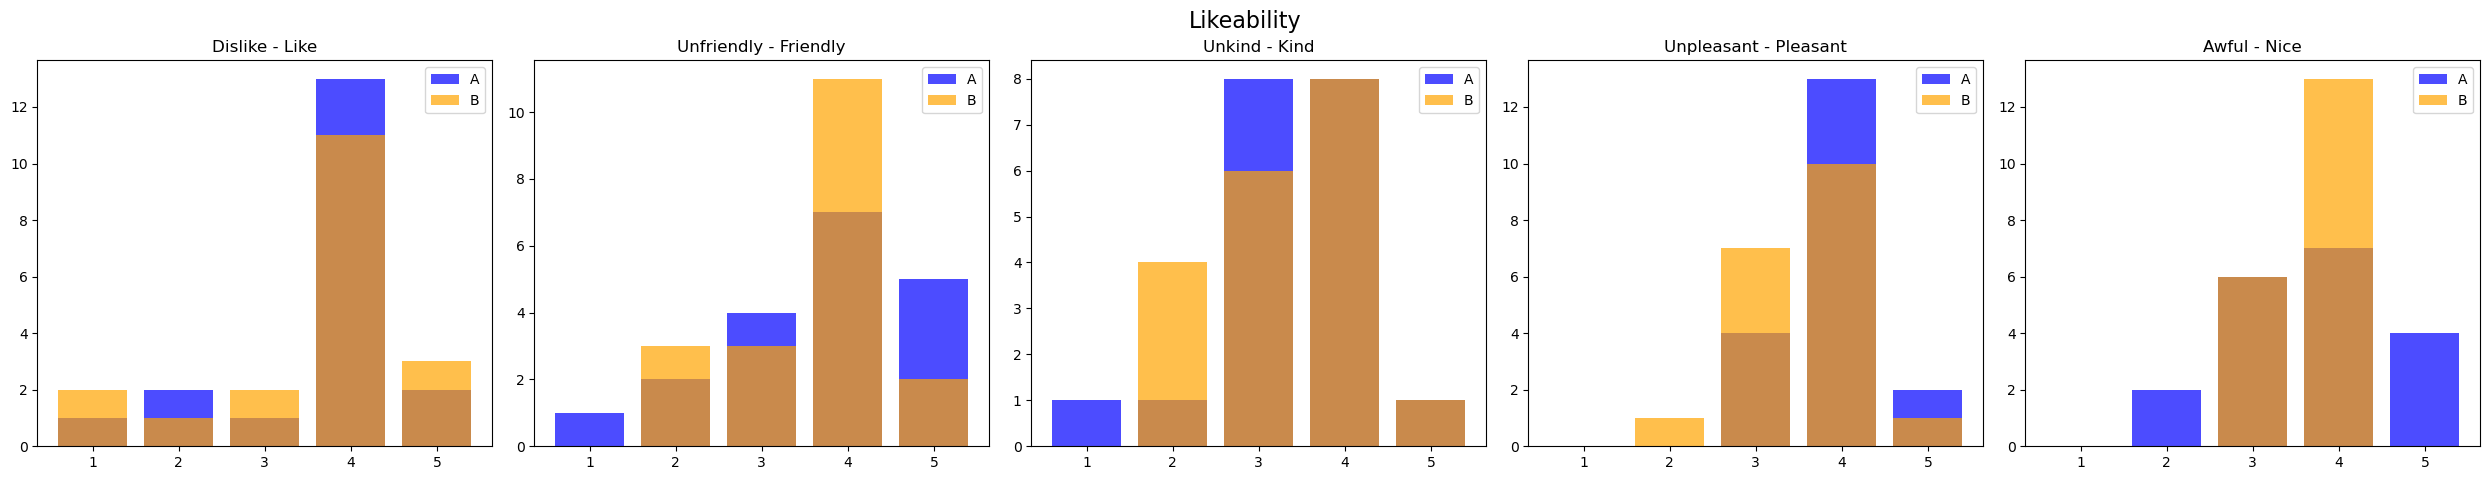

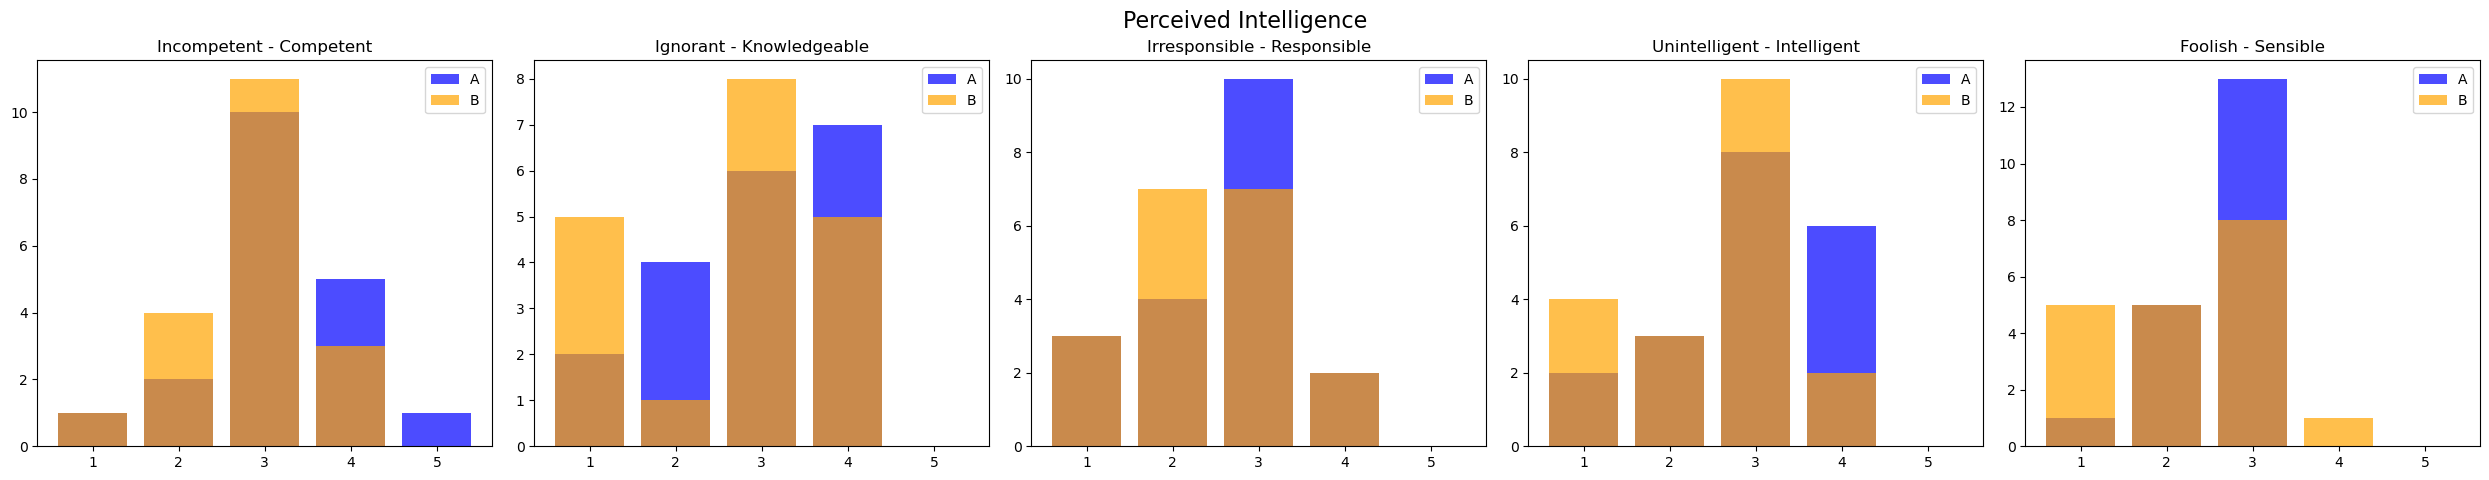

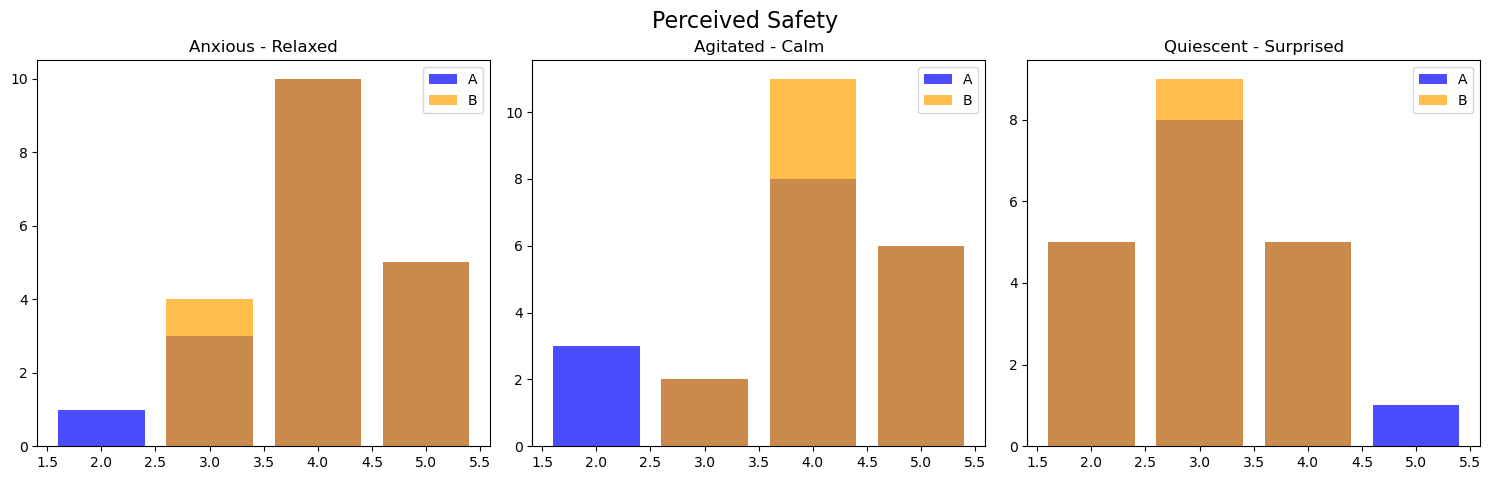

In [7]:
# Function to plot bar charts for a given category for both A_data and B_data
def plot_category(category_columns, A_data, B_data, title, num_cols=3):
    # Plotting subplots for each category
    fig, axs = plt.subplots(1, len(category_columns), figsize=(5 * len(category_columns), 5), sharex=True)

    # Plot questions for A_data
    for i, category in enumerate(category_columns):
        axs[i].bar(A_data[category].value_counts().index, A_data[category].value_counts().values, alpha=0.7, label='A', color='blue')

    # Plot questions for B_data
    for i, category in enumerate(category_columns):
        axs[i].bar(B_data[category].value_counts().index, B_data[category].value_counts().values, alpha=0.7, label='B', color='orange')

        axs[i].set_title(category)
        axs[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize animacy for both A_data and B_data
plot_category(animacy_labels, A_data, B_data, "Animacy")

# Visualize likeability for both A_data and B_data
plot_category(likeability_labels, A_data, B_data, "Likeability")

# Visualize perceived intelligence for both A_data and B_data
plot_category(percived_intelligence_labels, A_data, B_data, "Perceived Intelligence")

# Visualize perceived safety for both A_data and B_data
plot_category(percived_safety_labels, A_data, B_data, "Perceived Safety")


#### T-Statistic and Significance

In [8]:
from scipy.stats import ttest_ind

# Define your question labels
all_question_labels = animacy_labels + likeability_labels + percived_intelligence_labels + percived_safety_labels

# Create an empty DataFrame to store results
comparison_results = pd.DataFrame(index=all_question_labels, columns=['T-statistic', 'P-value', 'Significant'])

# Loop through each question label and perform t-test
for question_label in all_question_labels:
    group_a_responses = A_data[question_label]
    group_b_responses = B_data[question_label]

    t_stat, p_value = ttest_ind(group_a_responses, group_b_responses)

    # Store results in the DataFrame
    comparison_results.loc[question_label, 'T-statistic'] = t_stat
    comparison_results.loc[question_label, 'P-value'] = p_value
    comparison_results.loc[question_label, 'Significant'] = 'Yes' if p_value < 0.05 else 'No'

# Display the comparison results
print(comparison_results)

# no question has a significant difference between the two groups


                            T-statistic   P-value Significant
Dead - Alive                  -0.142054  0.887829          No
Stagnant - Lively             -0.346989   0.73062          No
Mechanical - Organic          -0.601506  0.551273          No
Artificial - Lifelike           0.67828  0.501931          No
Inert - Interactive             0.33282  0.741201          No
Apathetic - Responsive         0.175262  0.861856          No
Dislike - Like                 0.149256  0.882185          No
Unfriendly - Friendly          0.156813  0.876269          No
Unkind - Kind                  0.182237  0.856419          No
Unpleasant - Pleasant          1.537844  0.132831          No
Awful - Nice                        0.0       1.0          No
Incompetent - Competent        1.166767  0.250976          No
Ignorant - Knowledgeable       0.741702  0.463079          No
Irresponsible - Responsible    0.539784  0.592669          No
Unintelligent - Intelligent    1.341641  0.188115          No
Foolish 

### Cronbach's Alpha Reliability


In [9]:
# evaluate the reliability of the questionnaire

import pingouin as pg

# Define your category labels
categories = [animacy_labels, likeability_labels, percived_intelligence_labels, percived_safety_labels]

# Loop through each category and calculate Cronbach's Alpha
print(f"A: Cronbach's Alpha:")
for category in categories:
    category_data = A_data[category]  # Assuming A_data contains your Likert scale responses for each category
    alpha_result = pg.cronbach_alpha(category_data)
    print(f"Cronbach's Alpha for {category}: {alpha_result[0]:.4f}")

print(f"\nB: Cronbach's Alpha:")
for category in categories:
    category_data = B_data[category]  # Assuming A_data contains your Likert scale responses for each category
    alpha_result = pg.cronbach_alpha(category_data)
    print(f"Cronbach's Alpha for {category}: {alpha_result[0]:.4f}")

# Cronbach's Alpha
# >= 0.9 = excellent
# 0.8 - 0.9 = good
# 0.7 - 0.8 = acceptable
# 0.6 - 0.7 = questionable
# 0.5 - 0.6 = poor
# < 0.5 = unacceptable

# except for the perceived safety category, all categories have a Cronbach's Alpha of > 0.7, which is good - acceptable

A: Cronbach's Alpha:
Cronbach's Alpha for ['Dead - Alive', 'Stagnant - Lively', 'Mechanical - Organic', 'Artificial - Lifelike', 'Inert - Interactive', 'Apathetic - Responsive']: 0.8332
Cronbach's Alpha for ['Dislike - Like', 'Unfriendly - Friendly', 'Unkind - Kind', 'Unpleasant - Pleasant', 'Awful - Nice']: 0.8996
Cronbach's Alpha for ['Incompetent - Competent', 'Ignorant - Knowledgeable', 'Irresponsible - Responsible', 'Unintelligent - Intelligent', 'Foolish - Sensible']: 0.7108
Cronbach's Alpha for ['Anxious - Relaxed', 'Agitated - Calm', 'Quiescent - Surprised']: 0.2791

B: Cronbach's Alpha:
Cronbach's Alpha for ['Dead - Alive', 'Stagnant - Lively', 'Mechanical - Organic', 'Artificial - Lifelike', 'Inert - Interactive', 'Apathetic - Responsive']: 0.7550
Cronbach's Alpha for ['Dislike - Like', 'Unfriendly - Friendly', 'Unkind - Kind', 'Unpleasant - Pleasant', 'Awful - Nice']: 0.8364
Cronbach's Alpha for ['Incompetent - Competent', 'Ignorant - Knowledgeable', 'Irresponsible - Respons

### Calculate Mean Scores

In [10]:
# calucalte mean score for comparision as suggested in https://www.bartneck.de/publications/2009/measurementInstrumentsRobots/
categories = {
    'Animacy': animacy_labels,
    'Likeability': likeability_labels,
    'Perceived Intelligence': percived_intelligence_labels,
    'Perceived Safety': percived_safety_labels
}

# Loop through each category and calculate mean scores
for category, labels in categories.items():
    # Select the relevant columns for the current category
    category_data_A = A_data[labels]
    category_data_B = B_data[labels]

    # Calculate mean scores for each respondent
    mean_scores_A = category_data_A.mean(axis=1)
    mean_scores_B = category_data_B.mean(axis=1)

    # Calculate overall mean score for each group
    overall_mean_A = mean_scores_A.mean()
    overall_mean_B = mean_scores_B.mean()

    print(f"Overall Mean Score for {category} - A: {overall_mean_A:.4f}")
    print(f"Overall Mean Score for {category} - B: {overall_mean_B:.4f}\n")


Overall Mean Score for Animacy - A: 2.6491
Overall Mean Score for Animacy - B: 2.6491

Overall Mean Score for Likeability - A: 3.6632
Overall Mean Score for Likeability - B: 3.5684

Overall Mean Score for Perceived Intelligence - A: 2.8526
Overall Mean Score for Perceived Intelligence - B: 2.5474

Overall Mean Score for Perceived Safety - A: 3.6667
Overall Mean Score for Perceived Safety - B: 3.7544



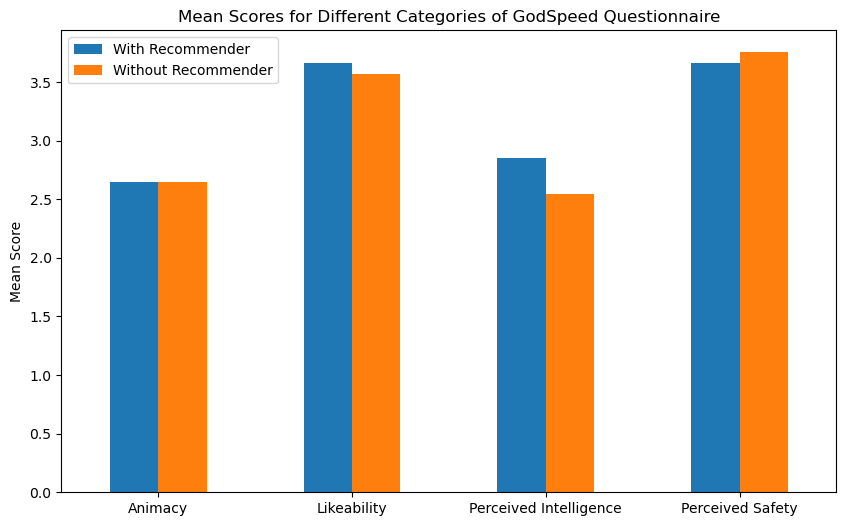

In [11]:
# visualize mean scores

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'A_data' and 'B_data' are your DataFrames with Likert scale responses
categories = {
    'Animacy': animacy_labels,
    'Likeability': likeability_labels,
    'Perceived Intelligence': percived_intelligence_labels,
    'Perceived Safety': percived_safety_labels
}

# Initialize an empty DataFrame to store mean scores
mean_scores_df = pd.DataFrame(index=categories.keys(), columns=['With Recommender', 'Without Recommender'])

# Loop through each category and calculate mean scores
for category, labels in categories.items():
    # Select the relevant columns for the current category
    category_data_A = A_data[labels]
    category_data_B = B_data[labels]

    # Calculate mean scores for each respondent
    mean_scores_A = category_data_A.mean(axis=1).mean()
    mean_scores_B = category_data_B.mean(axis=1).mean()

    # Store mean scores in the DataFrame
    mean_scores_df.loc[category, 'With Recommender'] = mean_scores_A
    mean_scores_df.loc[category, 'Without Recommender'] = mean_scores_B

# Plot the mean scores
ax = mean_scores_df.plot(kind='bar', rot=0, figsize=(10, 6))
ax.set_ylabel('Mean Score')
ax.set_title('Mean Scores for Different Categories of GodSpeed Questionnaire')

plt.show()


### A: With Recommender

<Axes: >

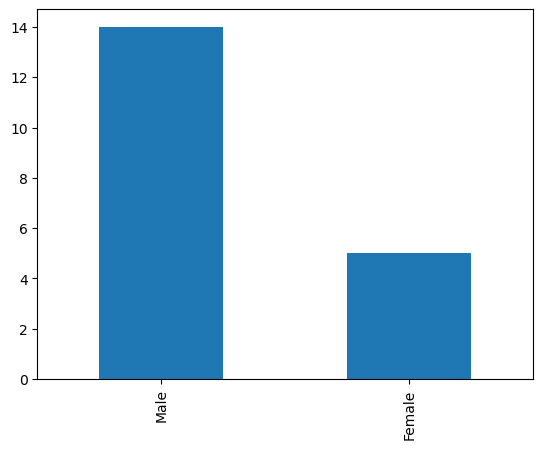

In [12]:

# print(A_data.describe())
# print(A_data.sum())

A_data["Gender"].value_counts().plot(kind='bar')


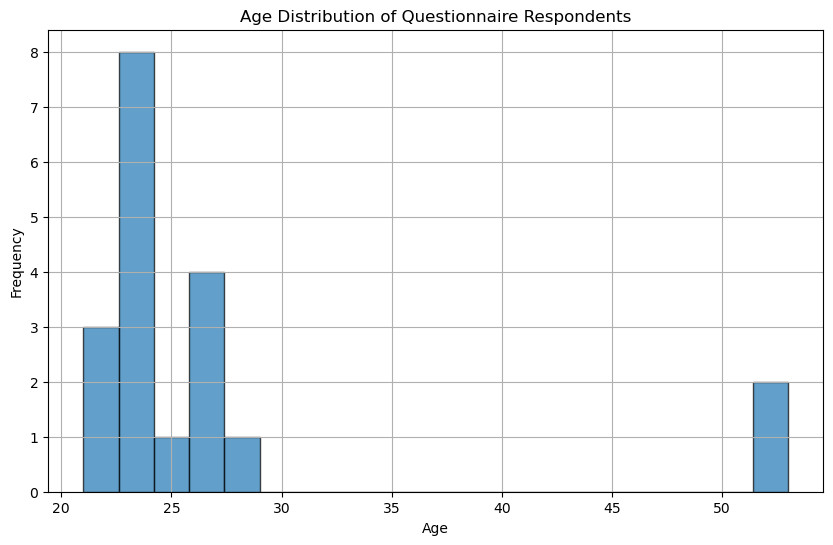

In [17]:
from datetime import datetime

df = B_data

df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%Y-%m-%d')

# Calculate ages
current_year = datetime.now().year
df['Age'] = current_year - df['Birthdate'].dt.year

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Questionnaire Respondents')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'A_data' and 'B_data' are your DataFrames with Likert scale responses
question_labels = animacy_labels + likeability_labels + percived_intelligence_labels + percived_safety_labels
responses = pd.concat([A_data, B_data], keys=['A_data', 'B_data'])

# 1. Descriptive Statistics
descriptive_stats_A = responses.loc['A_data'].describe()
descriptive_stats_B = responses.loc['B_data'].describe()
print(descriptive_stats_A[question_labels])




       Dead - Alive  Stagnant - Lively  Mechanical - Organic  \
count     19.000000          19.000000             19.000000   
mean       2.947368           2.842105              2.105263   
std        1.129094           0.958190              1.100239   
min        1.000000           1.000000              1.000000   
25%        2.000000           2.000000              1.000000   
50%        3.000000           3.000000              2.000000   
75%        4.000000           3.500000              3.000000   
max        5.000000           4.000000              5.000000   

       Artificial - Lifelike  Inert - Interactive  Apathetic - Responsive  \
count              19.000000            19.000000               19.000000   
mean                2.368421             2.842105                2.789474   
std                 1.011628             0.834210                0.976328   
min                 1.000000             1.000000                1.000000   
25%                 2.000000          

In [ ]:
print(descriptive_stats_B[question_labels])

       Dead - Alive  Stagnant - Lively  Mechanical - Organic  \
count     19.000000          19.000000             19.000000   
mean       3.000000           2.947368              2.315789   
std        1.154701           0.911268              1.056863   
min        1.000000           2.000000              1.000000   
25%        2.500000           2.000000              2.000000   
50%        3.000000           3.000000              2.000000   
75%        4.000000           4.000000              3.000000   
max        5.000000           4.000000              5.000000   

       Artificial - Lifelike  Inert - Interactive  Apathetic - Responsive  \
count              19.000000            19.000000               19.000000   
mean                2.157895             2.736842                2.736842   
std                 0.898342             1.097578                0.871914   
min                 1.000000             1.000000                1.000000   
25%                 1.500000          

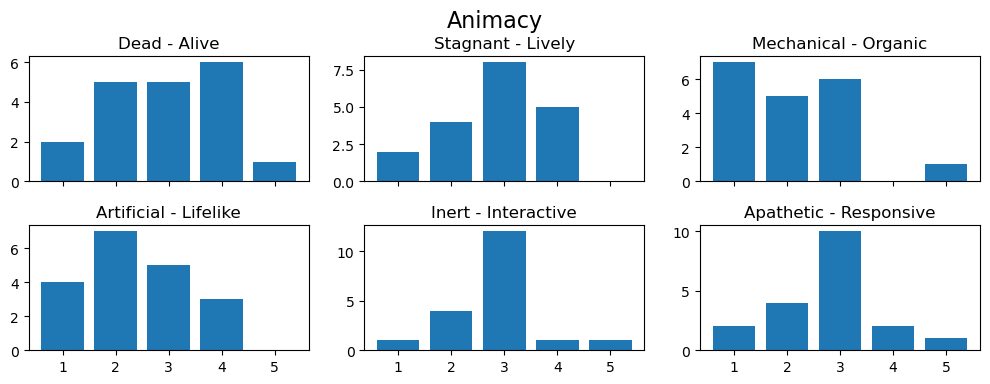

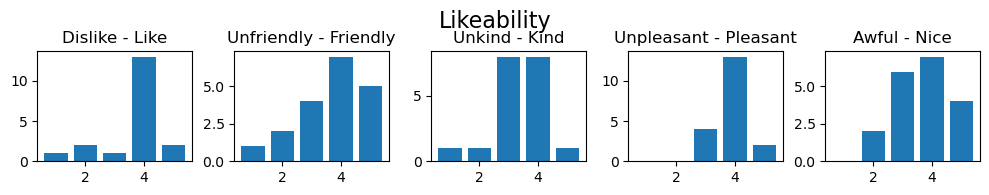

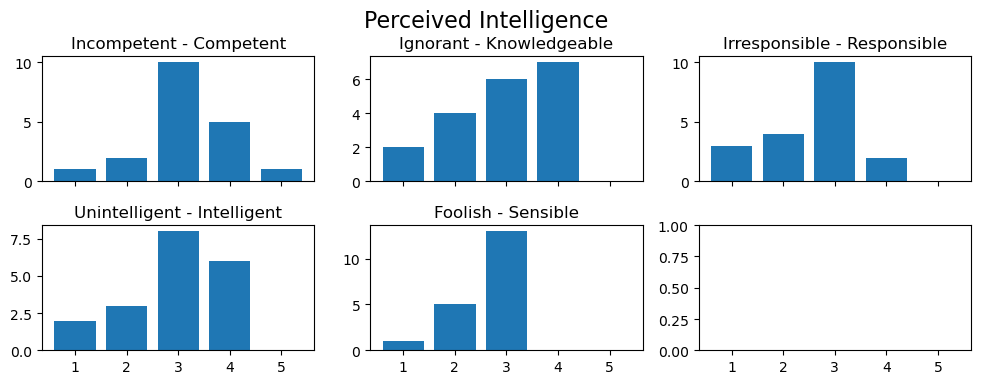

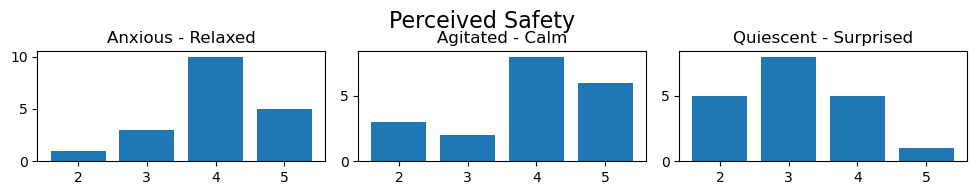

### B: Without Recommender

In [ ]:
# print(B_data.describe())
print(B_data.sum())


Date                           2023/12/18 1:54:40 p. m. CET2023/12/19 2:15:36...
Birthdate                      1999-05-202000-01-182002-10-091997-08-251971-0...
Gender                         MaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMale...
Latest Education               MasterBachelorBachelorBachelorMasterBachelorBa...
Dead - Alive                                                                  57
Stagnant - Lively                                                             56
Mechanical - Organic                                                          44
Artificial - Lifelike                                                         41
Inert - Interactive                                                           52
Apathetic - Responsive                                                        52
Dislike - Like                                                                69
Unfriendly - Friendly                                                         69
Unkind - Kind               

/tmp/ipykernel_31203/1648658247.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(B_data.sum())


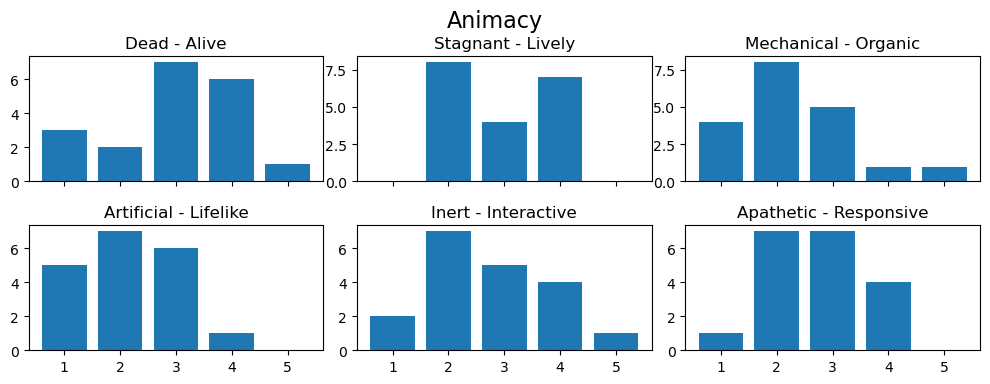

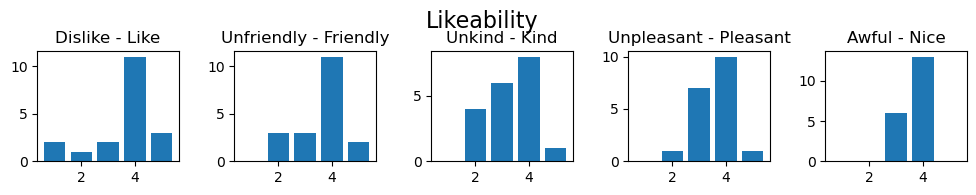

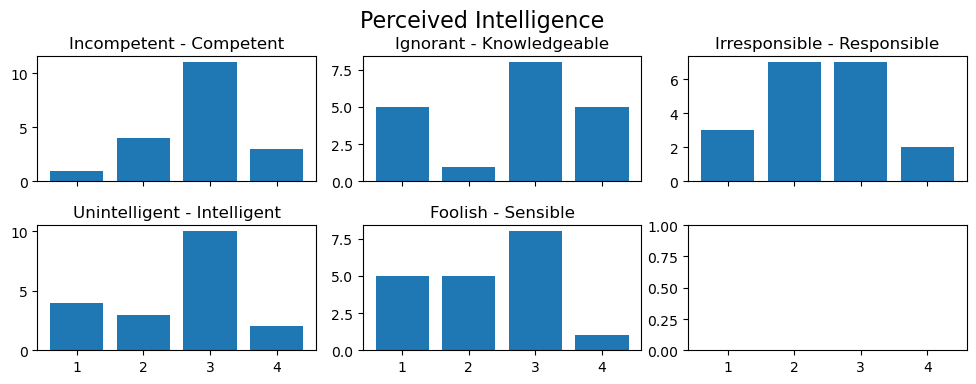

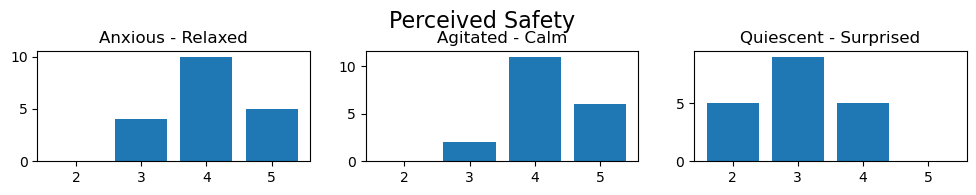

In [ ]:
# Visualize animacy
plot_category(animacy_labels, B_data, "Animacy", 2, 3)

# Visualize likeability
plot_category(likeability_labels, B_data, "Likeability", 1, 5)

# Visualize perceived intelligence
plot_category(percived_intelligence_labels, B_data, "Perceived Intelligence", 2, 3)

# Visualize perceived safety
plot_category(percived_safety_labels, B_data, "Perceived Safety", 1, 3)
